# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# indicates beginning
print("Beginning Data Retrieval     ")
print("-----------------------------")

# setting counters
record_count = 1
set_count = 1

# looping through cities
for i, city in enumerate(cities):
        
    # this could help for logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # endpoint url for each city
    city_url = url + "&q=" + city
    
    # logging and setting
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    # API request for each city
    try:
        # retrieving and parsing
        city_weather = requests.get(city_url).json()

        # max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # adding to city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # skip the city if error
    except:
        print("City not found. Skipping...")
        pass
              
# completion message
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mercedes
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | salalah
Processing Record 8 of Set 1 | almoloya
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | vana-voidu
City not found. Skipping...
Processing Record 14 of Set 1 | stornoway
Processing Record 15 of Set 1 | malwan
City not found. Skipping...
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | fortu

Processing Record 33 of Set 4 | kavaratti
Processing Record 34 of Set 4 | kupang
Processing Record 35 of Set 4 | husavik
Processing Record 36 of Set 4 | barranca
Processing Record 37 of Set 4 | punta alta
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | gizo
Processing Record 40 of Set 4 | davila
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | hecun
Processing Record 44 of Set 4 | grandview
Processing Record 45 of Set 4 | saint anthony
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | edgewater
Processing Record 48 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 49 of Set 4 | moskovskiy
Processing Record 0 of Set 5 | alyangula
Processing Record 1 of Set 5 | norwich
Processing Record 2 of Set 5 | batticaloa
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | guerrero negro
Processing Recor

Processing Record 22 of Set 8 | kita
Processing Record 23 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 24 of Set 8 | ogaminana
Processing Record 25 of Set 8 | derzhavinsk
Processing Record 26 of Set 8 | daru
Processing Record 27 of Set 8 | namatanai
Processing Record 28 of Set 8 | novikovo
Processing Record 29 of Set 8 | mokrousovo
Processing Record 30 of Set 8 | cabedelo
Processing Record 31 of Set 8 | arawa
Processing Record 32 of Set 8 | manzhouli
Processing Record 33 of Set 8 | lerwick
Processing Record 34 of Set 8 | ariquemes
Processing Record 35 of Set 8 | nisia floresta
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | saleaula
City not found. Skipping...
Processing Record 39 of Set 8 | margate
Processing Record 40 of Set 8 | soyo
Processing Record 41 of Set 8 | havre-saint-pierre
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | opuwo
Processing Record 44 of S

Processing Record 8 of Set 12 | maragogi
Processing Record 9 of Set 12 | rudbar
Processing Record 10 of Set 12 | aviles
Processing Record 11 of Set 12 | japura
Processing Record 12 of Set 12 | yarada
Processing Record 13 of Set 12 | mocuba
Processing Record 14 of Set 12 | walvis bay
Processing Record 15 of Set 12 | price
Processing Record 16 of Set 12 | praya
Processing Record 17 of Set 12 | coquimbo
Processing Record 18 of Set 12 | puerto baquerizo moreno
Processing Record 19 of Set 12 | troitsko-pechorsk
Processing Record 20 of Set 12 | maykain
City not found. Skipping...
Processing Record 21 of Set 12 | berbera
Processing Record 22 of Set 12 | mamallapuram
Processing Record 23 of Set 12 | carutapera
Processing Record 24 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 25 of Set 12 | riga
Processing Record 26 of Set 12 | pokhara
Processing Record 27 of Set 12 | imperia
Processing Record 28 of Set 12 | tukrah
Processing Record 29 of Set 12 | lamar
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# converting to df
city_data_pd = pd.DataFrame(city_data)

city_data_pd.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.80,-139.03,77.90,71,4,13.71,PF,1605197937
1,cabo san lucas,22.89,-109.91,75.00,60,20,6.93,MX,1605197672
2,busselton,-33.65,115.33,64.99,72,88,12.97,AU,1605197937
3,mercedes,-34.65,-59.43,84.00,57,0,1.99,AR,1605197937
4,cockburn town,21.46,-71.14,81.63,76,45,26.96,TC,1605197696


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.226814,16.604726,58.429150,72.442478,50.253097,7.991062,1.605198e+09
std,33.114877,89.317658,25.383049,19.228164,37.592222,5.414511,7.412206e+01
min,-54.800000,-179.170000,-18.560000,10.000000,0.000000,0.220000,1.605198e+09
25%,-8.010000,-59.100000,42.800000,63.000000,11.000000,4.180000,1.605198e+09
50%,24.670000,16.860000,65.910000,76.000000,53.000000,6.930000,1.605198e+09
75%,47.970000,94.070000,78.800000,87.000000,90.000000,10.740000,1.605198e+09
max,78.220000,179.320000,99.570000,100.000000,100.000000,44.960000,1.605198e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
humid_city_data

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_pd.drop(humid_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.80,-139.03,77.90,71,4,13.71,PF,1605197937
1,cabo san lucas,22.89,-109.91,75.00,60,20,6.93,MX,1605197672
2,busselton,-33.65,115.33,64.99,72,88,12.97,AU,1605197937
3,mercedes,-34.65,-59.43,84.00,57,0,1.99,AR,1605197937
4,cockburn town,21.46,-71.14,81.63,76,45,26.96,TC,1605197696


In [13]:
# Extract relevant fields from the data frame

lat = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
clouds = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

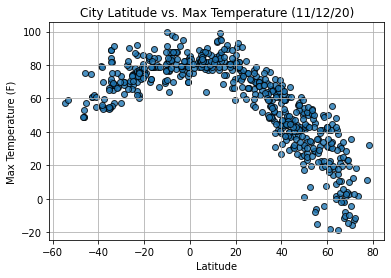

In [15]:
#latitude vs temp chart
plt.scatter(lat, 
            max_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# other graph features
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# saving
plt.savefig("output/Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

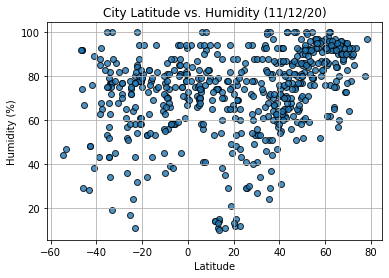

In [16]:
# scatter plot for latitude vs. humidity
plt.scatter(lat, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# other graph features
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# saving
plt.savefig("output/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

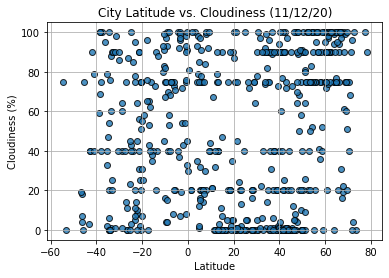

In [17]:
# scatter plot for latitude vs. cloudiness
plt.scatter(lat, 
            clouds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# other graph features
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# saving
plt.savefig("output/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

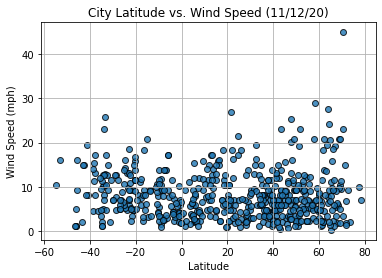

In [18]:
# scatter plot for latitude vs. wind speed
plt.scatter(lat, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# other graph features
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# saving
plt.savefig("output/Fig4.png")

plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # southern hem regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames

north_hem_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
south_hem_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7781756269784511


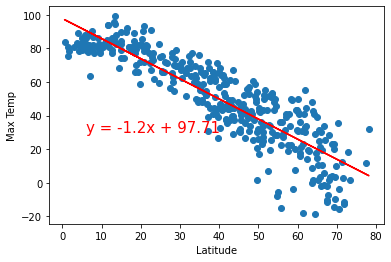

In [21]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

In [ ]:
# Solid correlation. Indicates that max temp and latitude have an inverse relationship in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38629226020095714


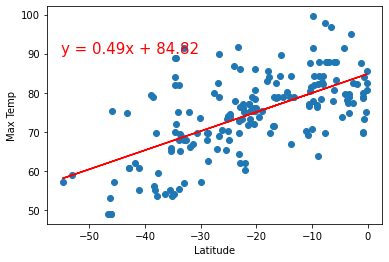

In [22]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

In [ ]:
#Not great correlation. Hard to find any relationship here. 
#Vague and weak general positive correlation with temp and latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.166923039986886


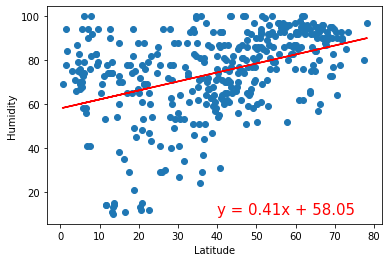

In [23]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

In [25]:
#Very weak correlation. Hard to establish any relationship here.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.023447648309075152


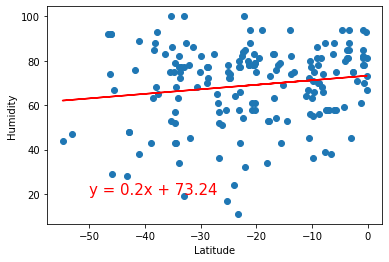

In [24]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

In [ ]:
#Very weak correlation. Hard to establish any relationship here.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09159327477870258


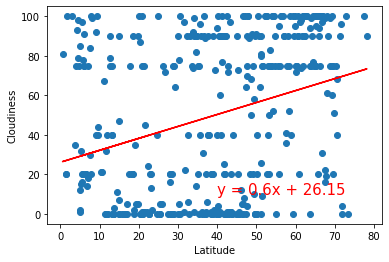

In [26]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

In [30]:
#No real correlation. There seem to be clusters of cloudiness packets but that is consistent throughout latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05508781041281272


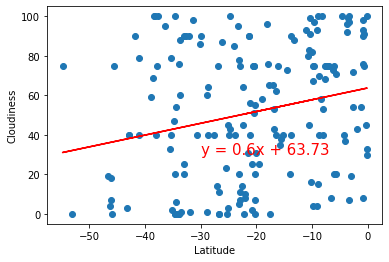

In [27]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [ ]:
#No correlation. Cloudiness is sporadic.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007432174074856328


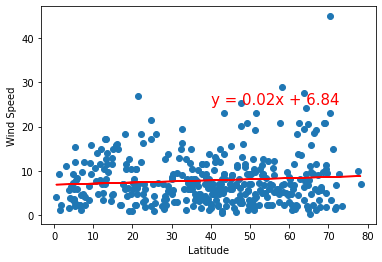

In [28]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

In [ ]:
#No correlation. No real relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05909960440463163


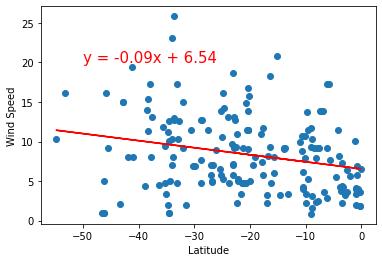

In [29]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

In [ ]:
#Slightly more correlation. Southern hemisphere seems to have wider distribution of wind speed than northern hemisphere.